<a href="https://colab.research.google.com/github/ParalelaUnsaac/2020-2/blob/main/170750_Gu%C3%ADa_Practica_sobre_Hilos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARALELISMO CON HILOS**

El siguiente código **identifica los hilos** utilizados. Las líneas 1-5 comentan el código siguiendo la estructura *input, procedimiento, output*

In [ ]:
#input: nro de hilos
#procedimiento:
# - Thread_worker() obtiene el nombre de un hilo con la función currentThread().getName() 
# - cada hilo llama a Thread_worker()
#output: Thread_worker() imprime el nombre del hilo tomado

import threading
  
THREADS_COUNT = 3  

class Threaded_worker(threading.Thread):
    def __init__(self):
        threading.Thread.__init__(self)
    def run(self):
        threadName = threading.currentThread().getName() 
        print("Hola, Soy el thread(hilo) %s" % threadName)

print('Inicializando %d threads...' % THREADS_COUNT)
for i in range(THREADS_COUNT):
    td = Threaded_worker()
    td.start()


Inicializando 3 threads...
Hola, Soy el thread(hilo) Thread-4
Hola, Soy el thread(hilo) Thread-5Hola, Soy el thread(hilo) Thread-6



El siguiente código utiliza la libreria **os** para nombras a los hilos como procesos. Analizar el código y comentarlo siguiendo la estructura *input-procedimiento-output*

In [ ]:
#input: nro de hilos
#procedimiento:
# - worker() obtiene el ID del proceso con la funcion getpid() e imprime
# - cada proceso llama a metodo worker()
#output: worker() imprime el nombre de los procesos

import multiprocessing
import os

WORKER_NUMBER = 5

def worker():
    PID = os.getpid()
    print ("Hola, soy el proceso son PID %d" % PID)

print ('Inicializando %d procesos...' % WORKER_NUMBER)

jobs = []
for i in range(WORKER_NUMBER):
    p = multiprocessing.Process(target=worker, args=())
    jobs.append(p)
    p.start()

Inicializando 5 procesos...
Hola, soy el proceso son PID 119
Hola, soy el proceso son PID 122
Hola, soy el proceso son PID 123
Hola, soy el proceso son PID 126
Hola, soy el proceso son PID 127


En el siguiente código ¿Porqué el hilo 3 no se imprime?

In [ ]:
import threading
def cuenta(n,name):
    count=n
    #Para el Hilo 3: tiene como parametros n = 3 por lo que no cumple la condicion del bucle while
    #Nunca llega a mostrar nada
    while count<3:
      print("%s in count %s" % (name, count))
      count+=1

t = threading.Thread(target=cuenta, args=(1, 'thread1'))
t2 = threading.Thread(target=cuenta, args=(2, 'thread2'))
t3 = threading.Thread(target=cuenta, args=(3, 'thread3'))

t.start()
t2.start()
t3.start()


thread1 in count 1
thread1 in count 2
thread2 in count 2


A continuación vamos a usar la **función time** para verificar el tiempo de paralelización. El codigo a continuación imprime el inició y fin luego de x segundos

In [ ]:
import time

print ("Start : %s" % time.ctime())
time.sleep(4)
print ("End : %s" % time.ctime())


Start : Wed Dec  2 12:08:36 2020
End : Wed Dec  2 12:08:40 2020


El siguiente ejemplo da un espacio entre los hilos, lo cual se verifica con la función time. ¿Existe paralelismo aqui? explicar

In [ ]:
import threading
import time

def print_time(name):
    count = 0   
    print("inicio %s: %s. count %s" % ( name, time.ctime(), count))
    while count < 5:
        count+=1
        print("%s: %s. count %s" % ( name, time.ctime(time.time()), count))

        
t1 = threading.Thread(target=print_time, args=("Thread-1", ) )
t2 = threading.Thread(target=print_time, args=("Thread-2", ) )

t1.start()
time.sleep(2)
t2.start()
#Ambos hilos se ejecutan secuecialmente debido al retraso de 2s por el metodo Time.Sleep()

inicio Thread-1: Thu Dec  3 04:13:23 2020. count 0
Thread-1: Thu Dec  3 04:13:23 2020. count 1
Thread-1: Thu Dec  3 04:13:23 2020. count 2
Thread-1: Thu Dec  3 04:13:23 2020. count 3
Thread-1: Thu Dec  3 04:13:23 2020. count 4
Thread-1: Thu Dec  3 04:13:23 2020. count 5
inicio Thread-2: Thu Dec  3 04:13:25 2020. count 0
Thread-2: Thu Dec  3 04:13:25 2020. count 1
Thread-2: Thu Dec  3 04:13:25 2020. count 2
Thread-2: Thu Dec  3 04:13:25 2020. count 3
Thread-2: Thu Dec  3 04:13:25 2020. count 4
Thread-2: Thu Dec  3 04:13:25 2020. count 5


**Problema propuesto:** 
Ejecute varias veces el código a continuación y explique al menos 2 resultados diferentes

In [ ]:
import threading
import time

def print_time(name, n):
    count = 0   
    print("Para el Hilo: %s, en el momento: %s, su valor de count es: %s" % ( name, time.ctime(), count))
    while count < 5:
        time.sleep(n)
        count+=1
        print("%s: %s. count %s" % ( name, time.ctime(), count))


    
t1 = threading.Thread(target=print_time, args=("Thread-1", 2, ) )
#t2 = threading.Thread(target=print_time, args=("Thread-2", 4, ) )


t1.start()
#t2.start()

Thread-1: Thu Dec  3 21:58:16 2020. count 5
Para el Hilo: Thread-1, en el momento: Thu Dec  3 21:58:16 2020, su valor de count es: 0


PRIMER RESULTADO:

Al ejecutar el codigo el resultado por lo general muetra los nombres de los dos hilos con su contador en 0 (cout = 0).
Es decir ambos hilos se ejecutan en paralelo.

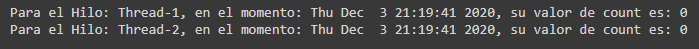

SEGUNDO RESULRTADO:

Ejecutando el codigo varias veces, vemos que nos muestra resultados diferentes.
Como se ven en la imagen nos muestra los nombres de los hilos con su respectivo contador (cout).


*   Para Thread-1 cout = [0, 3 , 4]
*   Para Thread-2 cout = [0, 2]

Los dos hilos se ejecutaron en paralelo por lo que todas la lineas de codigo del modulo print_time(name, n) se ejecutaron al mismo tiempo (21:22:14), lo cual significa que existe un condicion de carrera lo cual genera un conflicto al momento de mostrar los resultados, es por eso que cada vez que ejecutamos el codigo nos muestra diferentes resultados siendo el PRIMER RESULTADO el mas comun.

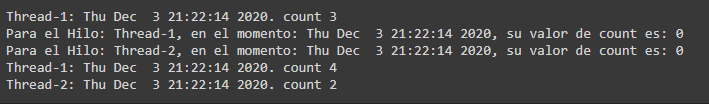

Python 3.9.0

Sin embargo al ejecutar el mismo codigo en python 3.9.0 obtenemos estos resultados.
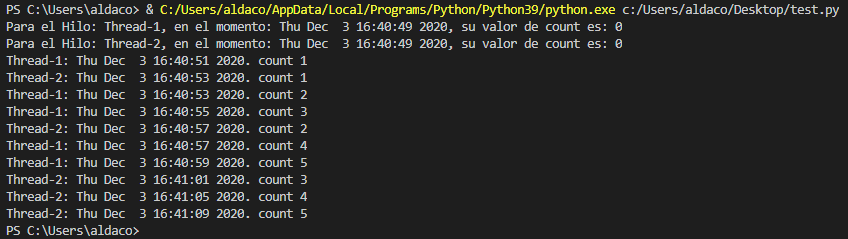

Cuando el contador es 0, ambos hilos se ejecutan en paralelo, pero cuando ingresa al bucle while este no se ejecuta simultaneamente.

En el bucle while cada hilo muestra los resultados con respecto al tiempo de retraso con el que este asignado.


Fuentes: 
http://codigo-python.blogspot.com/2016/11/hilos-y-procesos-i.html

https://www.tutorialspoint.com/python3/time_sleep.htm

https://docs.python.org/es/3/library/threading.html#thread-objects

https://en.wikipedia.org/wiki/Flynn%27s_taxonomy

https://github.com/antonioam82/ejercicios-python